<a href="https://colab.research.google.com/github/Marcysp/uts-machine-learning-ti3f/blob/main/UTS_AlvinaMarcySyakirahP_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UTS Machine Learning

Nama : Alvina Marcy Syakirah P.

Kelas: TI - 3F

NIM : 2141720017

# Segmentasi Gambar dengan Clustering

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

### Kode bantuan

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.cluster import KMeans  # Impor KMeans dari scikit-learn untuk pengelompokan data.
import os  # Impor modul os untuk fungsi sistem operasi.
import random  # Impor modul random untuk menghasilkan angka acak.
import matplotlib.pyplot as plt  # Impor Matplotlib lagi untuk visualisasi.
from sklearn.cluster import KMeans

In [2]:
# Import Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Memilih 5 citra secara random


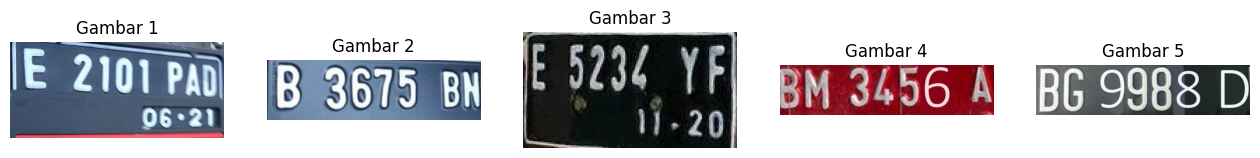

In [3]:
# Path direktori yang berisi gambar-gambar dataset.
direct_data = '/content/drive/MyDrive/ML/dummy'

# Inisialisasi list untuk menyimpan path gambar yang dipilih.
selected_images = []

# Mendapatkan daftar file gambar dalam direktori dataset.
image_files = [os.path.join(direct_data, file) for file in os.listdir(direct_data)]

# Memilih secara acak 5 gambar dari daftar gambar yang tersedia.
num_images_to_select = 5
selected_images = random.sample(image_files, num_images_to_select)

# Inisialisasi subplot untuk menampilkan gambar dalam 1 baris dan 5 kolom.
fig, ax = plt.subplots(1, 5, figsize=(16, 9))

for i, image_path in enumerate(selected_images):
    # Membaca gambar dari path.
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar di subplot yang sesuai.
    ax[i].imshow(image)
    ax[i].set_title(f'Gambar {i+1}')
    ax[i].axis('off')

# Menampilkan semua gambar yang dipilih.
plt.show()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menampilkan Tinggi, Lebar, dan saluran warna pada title gambar

In [5]:
for i, image_path in enumerate(selected_images):
    image = cv2.imread(image_path)
    h, w, ch = image.shape
    print(f"Gambar {i+1} - Tinggi: {h}, Lebar: {w}, Saluran Warna: {ch}")

Gambar 1 - Tinggi: 303, Lebar: 670, Saluran Warna: 3
Gambar 2 - Tinggi: 343, Lebar: 1233, Saluran Warna: 3
Gambar 3 - Tinggi: 83, Lebar: 153, Saluran Warna: 3
Gambar 4 - Tinggi: 258, Lebar: 1101, Saluran Warna: 3
Gambar 5 - Tinggi: 324, Lebar: 1366, Saluran Warna: 3


### Menampilkan data shape

In [6]:
for i, image_path in enumerate(selected_images):
    # Membaca gambar
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, ch = image.shape

    # Normalisasi nilai piksel menjadi rentang [0, 1]
    data = image / 255.0

    # Reshape data piksel menjadi format yang dapat diolah oleh K-Means
    data = data.reshape(h * w, ch)

    # Cetak bentuk data piksel yang telah diolah
    print(f"Bentuk gambar ke-{i+1}:", data.shape)


Bentuk gambar ke-1: (203010, 3)
Bentuk gambar ke-2: (422919, 3)
Bentuk gambar ke-3: (12699, 3)
Bentuk gambar ke-4: (284058, 3)
Bentuk gambar ke-5: (442584, 3)


In [7]:
# Mendefinisikan fungsi plot_pixels dengan parameter data, title, colors, dan N
def plot_pixels(data, title, colors=None, N=10000):
    # Jika tidak ada daftar warna yang diberikan, gunakan data warna
    if colors is None:
        colors = data

    # Buat generator angka acak dengan seed 0
    rng = np.random.RandomState(0)

    # Pilih subset data berdasarkan indeks acak
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]

    # Pisahkan komponen warna (R, G, B)
    R, G, B = data[i].T

    # Buat plot scatter plot dengan komponen warna
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))


## Visualisasi data Warna Segmentasi, Klasterisasi dan Hasil Segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

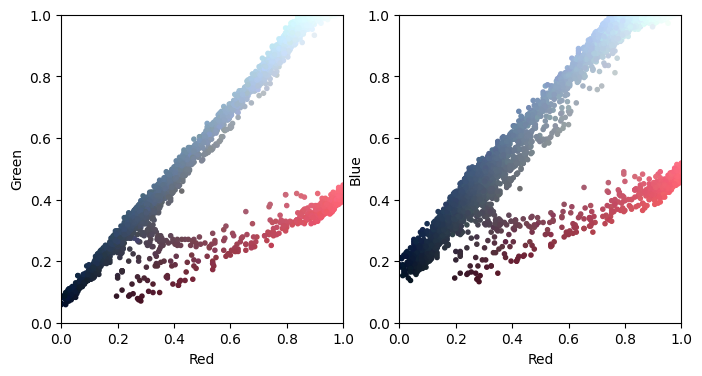

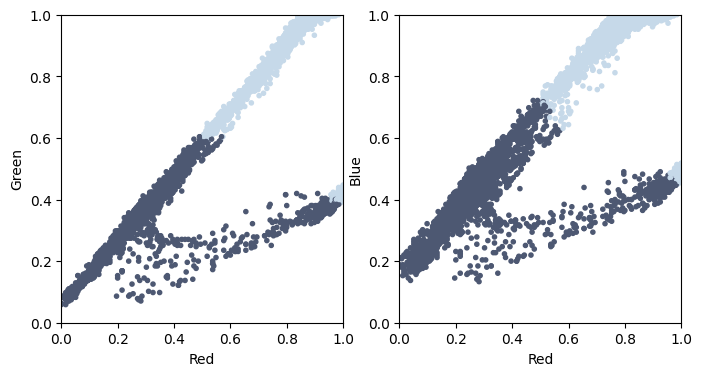

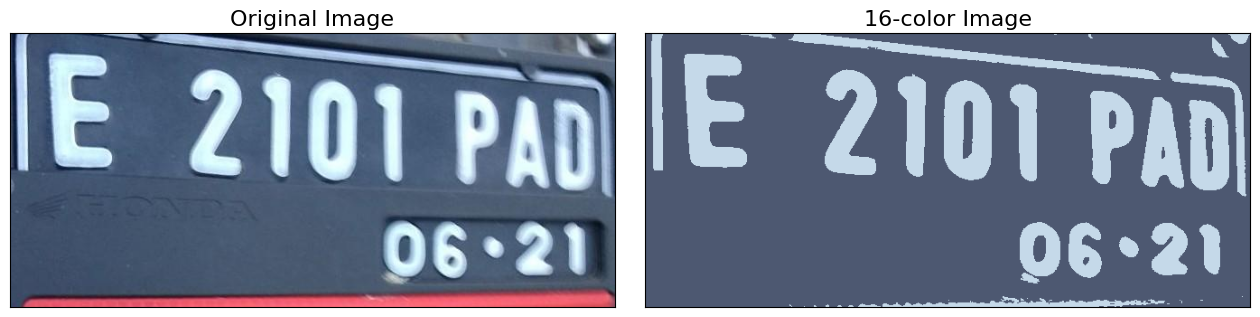

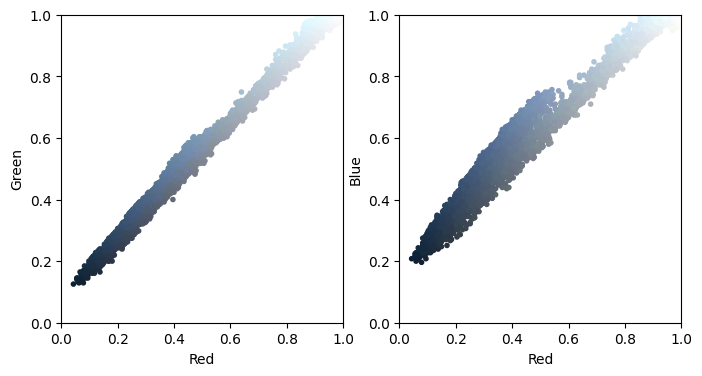

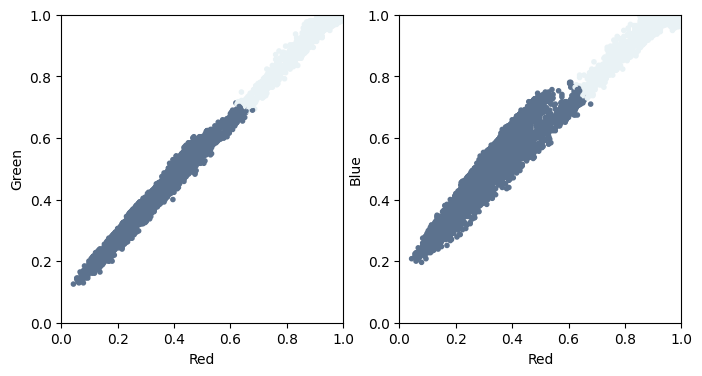

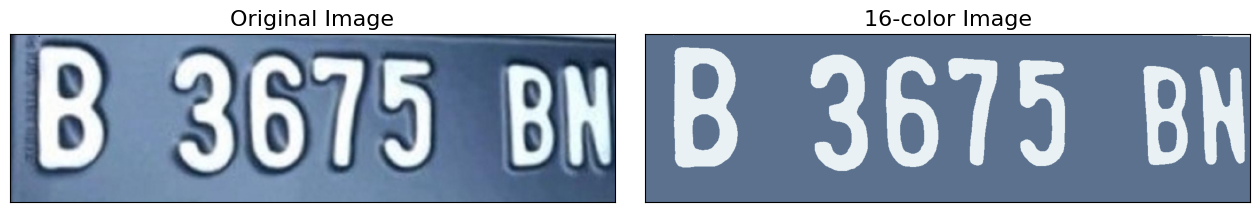

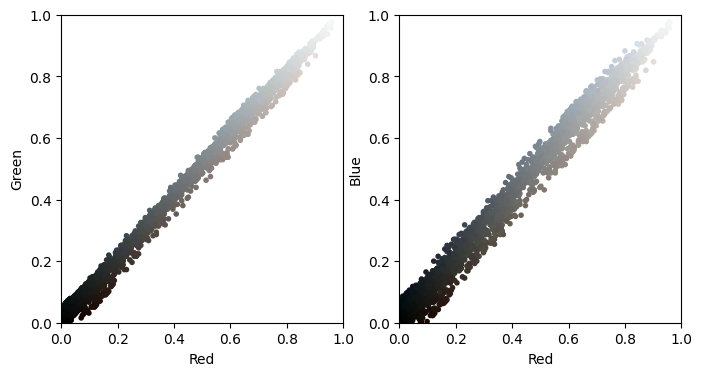

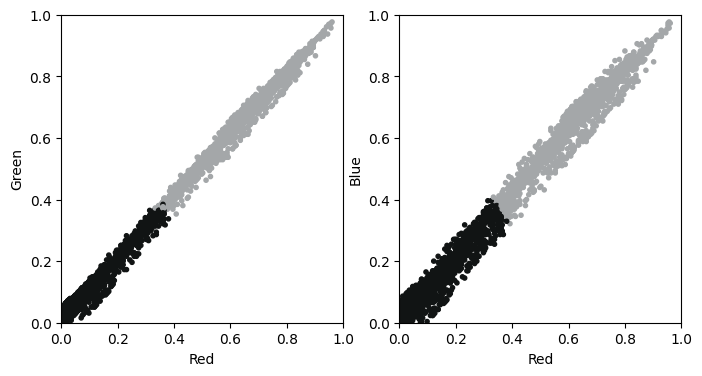

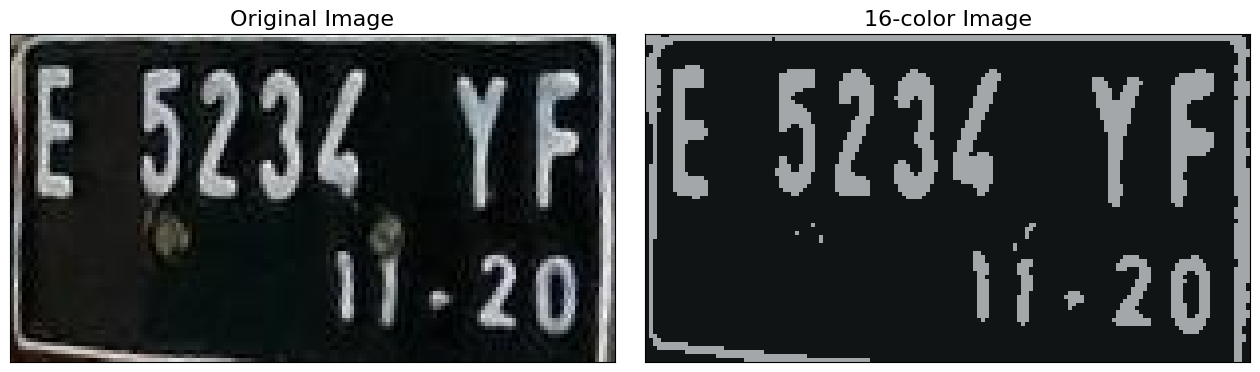

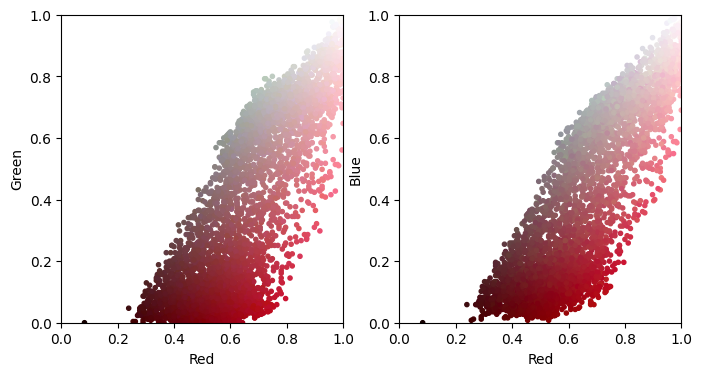

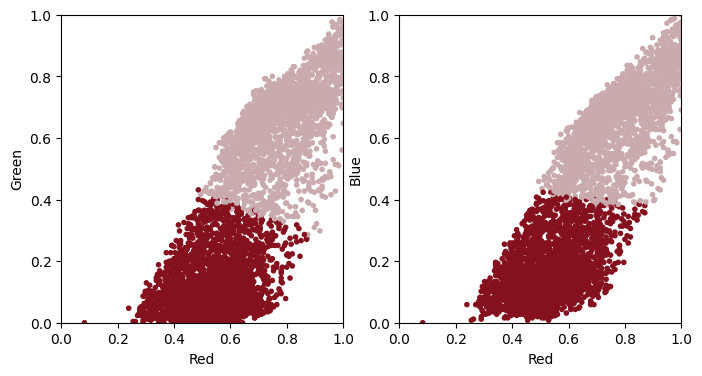

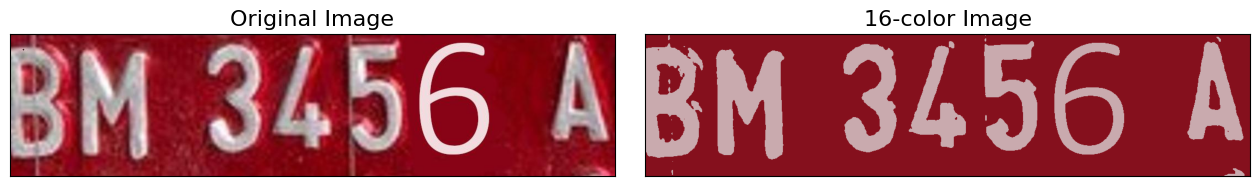

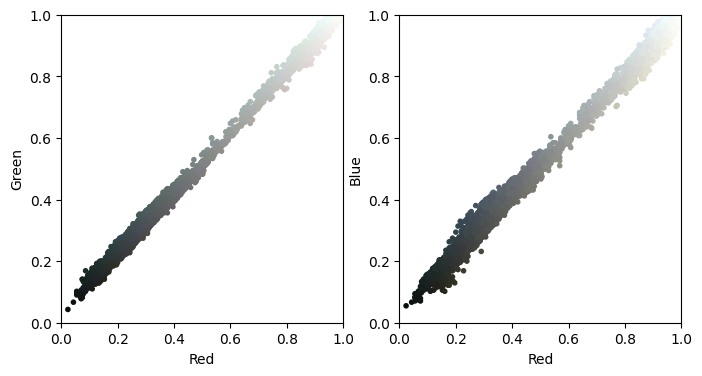

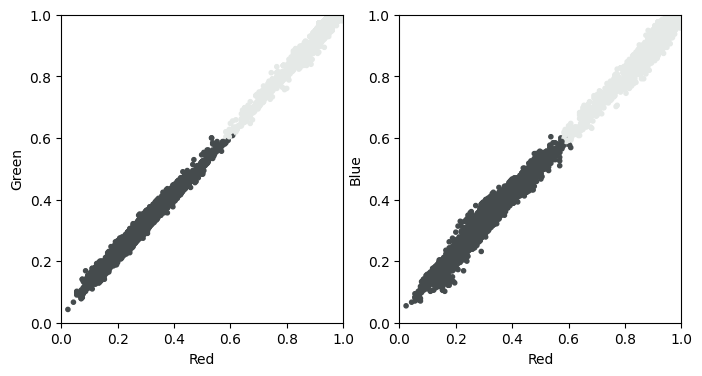

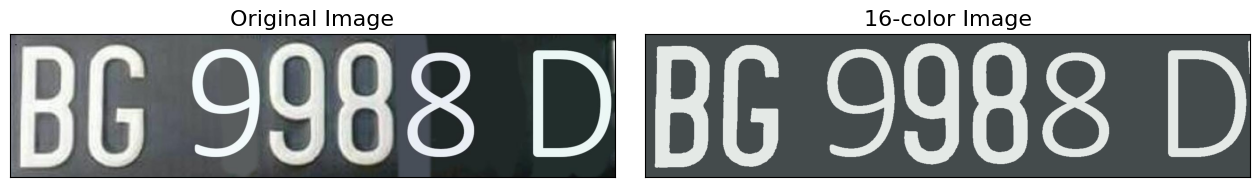

In [8]:
for image_path in selected_images:
  image = cv2.imread(image_path)
  h, w, ch= image.shape
  data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  data = data / 255.0
  data = data.reshape(h * w, ch)

  plot_pixels(data, title='Input color space: 16 million possible colors')

  kmeans = KMeans(2)
  kmeans.fit(data)
  new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

  plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors")

  plat_recolored = new_colors.reshape(image.shape)
  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(plat_recolored)
  ax[1].set_title('16-color Image', size=16)